<a href="https://colab.research.google.com/github/wjohnson7/WJcosc470s24/blob/main/solutions/WJFastNeuralNetwork_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **Hello, world** of neural networks
This code builds a simple neural network that can recognize handwritten 28x28 pixel digits.

Our first version will have 15 neurons in the hidden layer and 10 output neurons.

See image below:
http://neuralnetworksanddeeplearning.com/images/tikz12.png

How many weights in this network?
11760 weights in the first layer (784 * 15) and 150 weights in the second layer (15 * 10) = 11910 weights total
15 biases in the hidden layer and 10 biases in the output layer = 25 biases total.
11910 + 25 = 11935 parameters!

In [28]:
!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython nn
%cd nn

Cloning into 'nn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 63 (delta 1), reused 3 (delta 0), pack-reused 55
Receiving objects: 100% (63/63), 16.43 MiB | 19.25 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/nn/nn/nn


In [29]:
# this code depends on having executed the previous cell
# (i.e., you need to have cloned the nn code and cd'ed into it)
import network
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)


In [30]:
import numpy as np
print(np.shape(training_data))
print(np.shape(training_data[0][0]))
print(np.shape(training_data[0][1]))
print(training_data[0][1])

(50000, 2)
(784, 1)
(10, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [31]:
# average digit darkness
# step 1 - write a function that can calculate the darkness of a single image
def image_darkness(imgpixeldata):
  darkness_total = 0
  for x in imgpixeldata:
    darkness_total = darkness_total + x
  return darkness_total[0]

# step 2 - call that function on all the training images and calculate the average darkness of each digit
darkness = image_darkness(training_data[0][0])
whichimage = np.argmax(training_data[0][1])
print(f"The first image was a {whichimage} and its darkness was {darkness}")
darkness = image_darkness(training_data[1][0])
whichimage = np.argmax(training_data[1][1])
print(f"The second image was a {whichimage} and its darkness was {darkness}")

# There are 10 darkness totals since there are 10 possible digits (0 through 9) to give a darkness value

# define a 10-element list of darkness totals
darkness_totals = [0 for _ in range(10)]
# define a 10-element list of digit counts
darkness_counts = [0 for _ in range(10)]

# iterate through each image and update the two data structures
for training_img in training_data:
  darkness = image_darkness(training_img[0]) # replace this with the correct function call!
  whichimage = np.argmax(training_img[1])
  darkness_totals[whichimage] += darkness
  darkness_counts[whichimage] += 1

# now calculate the averages
darkness_averages = [darkness_totals[i]/darkness_counts[i] for i in range(10)]

print(darkness_counts)
print(darkness_averages)

# step 3 - use those averages to classify all the test data images and count how many of each digit you get right
def find_closest(darkness, darkness_averages):
  # add code here that determines which average was closest to darkness

  closest_num = min(range(len(darkness_averages)), key=lambda i: abs(darkness_averages[i] - darkness))
  return closest_num

correct_counts = [0 for _ in range(10)]
wrong_counts = [0 for _ in range(10)]

for imgdata, whichimage in test_data:
  darkness = image_darkness(imgdata)
  # see which darkness_average is closest to "darkness" and make that our classification for this image
  closest_digit = find_closest(darkness, darkness_averages)
  if closest_digit == whichimage:
    correct_counts[whichimage] += 1
  else:
    wrong_counts[whichimage] += 1

# now that we have our correct/wrong counts, turn that into accuracies
digit_accuracies = [correct_counts[i]/(correct_counts[i]+wrong_counts[i]) for i in range(10)]
print(digit_accuracies)

The first image was a 5 and its darkness was 107.51953125
The second image was a 0 and its darkness was 121.46484375
[4932, 5678, 4968, 5101, 4859, 4506, 4951, 5175, 4842, 4988]
[135.8691200324412, 59.66034750352237, 116.294303857186, 110.87092451235051, 95.22073970338548, 100.34646166222814, 107.38312020298929, 89.8788345410628, 117.88056410703221, 96.0455585592923]
[0.5418367346938775, 0.8290748898678414, 0.04844961240310078, 0.048514851485148516, 0.048879837067209775, 0.0795964125560538, 0.06576200417536535, 0.28793774319066145, 0.13655030800821355, 0.04261645193260654]


In [32]:
print(np.shape(test_data))
print(np.shape(test_data[0]))
print(test_data[0][1])


(10000, 2)
(2,)
7


In [33]:
# part 2 - use this default configuration and the following hyper-parameters
#    epochs - 30
#    batch size - 10
#    learning rate - 3.0
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)


Epoch 0 : 9093 / 10000
Epoch 1 : 9245 / 10000
Epoch 2 : 9323 / 10000
Epoch 3 : 9331 / 10000
Epoch 4 : 9321 / 10000
Epoch 5 : 9378 / 10000
Epoch 6 : 9453 / 10000
Epoch 7 : 9429 / 10000
Epoch 8 : 9436 / 10000
Epoch 9 : 9465 / 10000
Epoch 10 : 9459 / 10000
Epoch 11 : 9473 / 10000
Epoch 12 : 9461 / 10000
Epoch 13 : 9471 / 10000
Epoch 14 : 9483 / 10000
Epoch 15 : 9465 / 10000
Epoch 16 : 9480 / 10000
Epoch 17 : 9484 / 10000
Epoch 18 : 9475 / 10000
Epoch 19 : 9477 / 10000
Epoch 20 : 9500 / 10000
Epoch 21 : 9507 / 10000
Epoch 22 : 9513 / 10000
Epoch 23 : 9509 / 10000
Epoch 24 : 9499 / 10000
Epoch 25 : 9504 / 10000
Epoch 26 : 9486 / 10000
Epoch 27 : 9480 / 10000
Epoch 28 : 9483 / 10000
Epoch 29 : 9507 / 10000


In [34]:
import numpy as np
a = net.feedforward(test_data[2][0])
print(a)
print(np.argmax(a))
print(test_data[2][1])

# per digit accuracies
# loop through the test data again
# calculate how many of each digit was classified correctly

correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x, y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
  digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/digit_counts[i] for i in range(10)]
print(accuracies)

[[1.09269769e-13]
 [9.94890298e-01]
 [2.72000819e-05]
 [5.49964814e-06]
 [9.99790078e-07]
 [1.22862094e-09]
 [7.43201316e-05]
 [2.44322877e-07]
 [7.64201328e-06]
 [1.29045532e-09]]
1
1
[954, 1115, 968, 953, 948, 834, 924, 979, 901, 931]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
[0.9734693877551021, 0.9823788546255506, 0.937984496124031, 0.9435643564356435, 0.9653767820773931, 0.9349775784753364, 0.964509394572025, 0.9523346303501945, 0.9250513347022588, 0.9226957383548068]


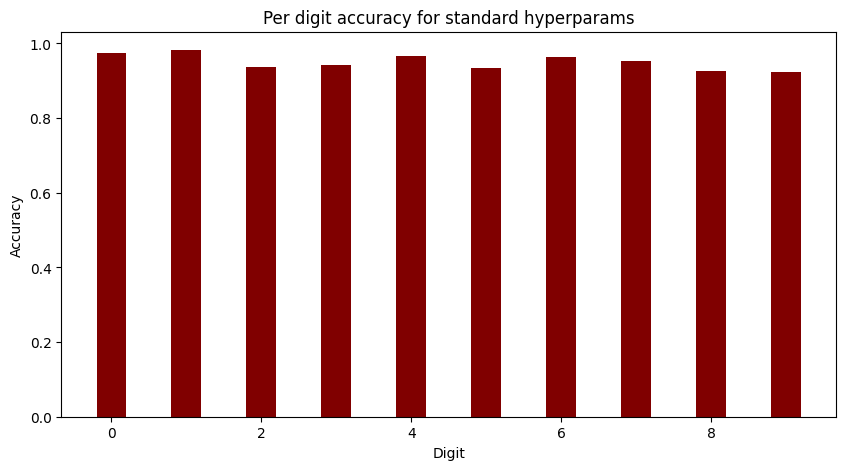

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(range(0,10), accuracies, color ='maroon',
        width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperparams")
plt.show()

In [36]:
print(np.shape(net.weights[0]))
print(net.weights[0])

(30, 784)
[[-0.37062729 -0.10022829  0.22968335 ...  0.19421188 -0.86612892
   2.28841653]
 [-1.11197709 -0.0505963   0.72912533 ...  1.74702212  0.35462244
   0.38667676]
 [ 2.27629184 -0.13393638  0.41877923 ...  0.88620006  1.43637424
   0.27219334]
 ...
 [ 0.37911043  0.90834907 -0.06892053 ... -1.78144084 -0.09661328
  -0.15226921]
 [ 1.67249537  0.42417291 -0.39935919 ... -0.88975857  2.46417721
   0.66327784]
 [-0.56045878  0.22701874  1.30833168 ...  0.83203603  0.08296062
   0.17970083]]


In [37]:
print(np.shape(net.weights[1]))
print(net.weights[1])

(10, 30)
[[-4.17644949e+00 -6.13875357e+00 -3.43494857e+00 -3.24229954e+00
  -6.32732028e-01 -1.50800864e+00 -3.28058723e-01  4.84228678e-01
   4.94050733e+00  3.32965575e+00  2.61630044e+00  1.50092437e+00
   1.84135592e+00 -4.02197742e+00 -1.51253730e+00 -3.69064957e+00
  -3.11130951e+00 -1.34185793e+00  1.60264917e+00  4.01376056e+00
  -4.42742712e+00 -1.24275883e+00 -1.23060059e+00 -3.98923647e+00
  -2.92143352e+00 -1.09585240e+00  5.20486148e+00  2.66736233e+00
  -5.77942080e+00  1.46635688e+00]
 [-6.29930467e+00 -1.26711790e+00  3.28807078e+00  4.60076322e+00
   4.87537965e+00  3.52075671e+00 -3.83225536e-02 -1.32283253e+00
   3.97076507e+00 -3.83800115e+00 -2.51352620e+00  2.30990983e+00
  -1.11480979e+00 -1.53982051e-01  2.67212594e-01  2.42821618e+00
  -1.57090511e+00 -3.49070630e+00 -2.55855415e+00  9.90789707e-01
   9.19333245e-01 -4.26578620e-01  2.94470546e-01 -2.54902980e+00
   3.21994042e+00  1.53408813e+00  3.11029606e+00  3.86519626e+00
  -3.48295684e+00 -3.06312231e+0

In [38]:
# part 3 - experiment with different hyper parameters
#  epochs - 5, 15, 30, 60 (batch size 10, learning 3.0)
#  batch - 5, 10, 50, 100 (epochs 30, learning 3.0)
#  learning rate - 1.0, 3.0, 5.0 (epochs 30, batch size 10)
net = network.Network([784, 30, 10])
net.SGD(training_data, 5, 10, 3.0, test_data=test_data)

Epoch 0 : 9070 / 10000
Epoch 1 : 9208 / 10000
Epoch 2 : 9296 / 10000
Epoch 3 : 9339 / 10000
Epoch 4 : 9384 / 10000


In [39]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 15, 10, 3.0, test_data=test_data)

Epoch 0 : 9067 / 10000
Epoch 1 : 9291 / 10000
Epoch 2 : 9369 / 10000
Epoch 3 : 9314 / 10000
Epoch 4 : 9409 / 10000
Epoch 5 : 9430 / 10000
Epoch 6 : 9433 / 10000
Epoch 7 : 9428 / 10000
Epoch 8 : 9415 / 10000
Epoch 9 : 9465 / 10000
Epoch 10 : 9469 / 10000
Epoch 11 : 9482 / 10000
Epoch 12 : 9492 / 10000
Epoch 13 : 9474 / 10000
Epoch 14 : 9487 / 10000


In [40]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 8302 / 10000
Epoch 1 : 8434 / 10000
Epoch 2 : 9197 / 10000
Epoch 3 : 9319 / 10000
Epoch 4 : 9383 / 10000
Epoch 5 : 9422 / 10000
Epoch 6 : 9368 / 10000
Epoch 7 : 9412 / 10000
Epoch 8 : 9472 / 10000
Epoch 9 : 9413 / 10000
Epoch 10 : 9452 / 10000
Epoch 11 : 9463 / 10000
Epoch 12 : 9449 / 10000
Epoch 13 : 9467 / 10000
Epoch 14 : 9497 / 10000
Epoch 15 : 9485 / 10000
Epoch 16 : 9496 / 10000
Epoch 17 : 9470 / 10000
Epoch 18 : 9475 / 10000
Epoch 19 : 9487 / 10000
Epoch 20 : 9466 / 10000
Epoch 21 : 9491 / 10000
Epoch 22 : 9488 / 10000
Epoch 23 : 9508 / 10000
Epoch 24 : 9498 / 10000
Epoch 25 : 9497 / 10000
Epoch 26 : 9488 / 10000
Epoch 27 : 9468 / 10000
Epoch 28 : 9483 / 10000
Epoch 29 : 9479 / 10000


In [41]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 60, 10, 3.0, test_data=test_data)

Epoch 0 : 9133 / 10000
Epoch 1 : 9254 / 10000
Epoch 2 : 9330 / 10000
Epoch 3 : 9354 / 10000
Epoch 4 : 9386 / 10000
Epoch 5 : 9348 / 10000
Epoch 6 : 9404 / 10000
Epoch 7 : 9432 / 10000
Epoch 8 : 9420 / 10000
Epoch 9 : 9496 / 10000
Epoch 10 : 9456 / 10000
Epoch 11 : 9476 / 10000
Epoch 12 : 9468 / 10000
Epoch 13 : 9465 / 10000
Epoch 14 : 9484 / 10000
Epoch 15 : 9467 / 10000
Epoch 16 : 9495 / 10000
Epoch 17 : 9472 / 10000
Epoch 18 : 9482 / 10000
Epoch 19 : 9506 / 10000
Epoch 20 : 9464 / 10000
Epoch 21 : 9503 / 10000
Epoch 22 : 9454 / 10000
Epoch 23 : 9479 / 10000
Epoch 24 : 9507 / 10000
Epoch 25 : 9501 / 10000
Epoch 26 : 9483 / 10000
Epoch 27 : 9498 / 10000
Epoch 28 : 9481 / 10000
Epoch 29 : 9503 / 10000
Epoch 30 : 9520 / 10000
Epoch 31 : 9474 / 10000
Epoch 32 : 9513 / 10000
Epoch 33 : 9499 / 10000
Epoch 34 : 9497 / 10000
Epoch 35 : 9506 / 10000
Epoch 36 : 9507 / 10000
Epoch 37 : 9497 / 10000
Epoch 38 : 9498 / 10000
Epoch 39 : 9501 / 10000
Epoch 40 : 9499 / 10000
Epoch 41 : 9510 / 10000
Ep

In [42]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 5, 3.0, test_data=test_data)

Epoch 0 : 9160 / 10000
Epoch 1 : 9234 / 10000
Epoch 2 : 9273 / 10000
Epoch 3 : 9378 / 10000
Epoch 4 : 9398 / 10000
Epoch 5 : 9388 / 10000
Epoch 6 : 9419 / 10000
Epoch 7 : 9421 / 10000
Epoch 8 : 9416 / 10000
Epoch 9 : 9467 / 10000
Epoch 10 : 9403 / 10000
Epoch 11 : 9461 / 10000
Epoch 12 : 9458 / 10000
Epoch 13 : 9484 / 10000
Epoch 14 : 9452 / 10000
Epoch 15 : 9498 / 10000
Epoch 16 : 9486 / 10000
Epoch 17 : 9495 / 10000
Epoch 18 : 9449 / 10000
Epoch 19 : 9473 / 10000
Epoch 20 : 9505 / 10000
Epoch 21 : 9483 / 10000
Epoch 22 : 9455 / 10000
Epoch 23 : 9465 / 10000
Epoch 24 : 9471 / 10000
Epoch 25 : 9505 / 10000
Epoch 26 : 9506 / 10000
Epoch 27 : 9506 / 10000
Epoch 28 : 9510 / 10000
Epoch 29 : 9465 / 10000


In [43]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 9081 / 10000
Epoch 1 : 9200 / 10000
Epoch 2 : 9286 / 10000
Epoch 3 : 9309 / 10000
Epoch 4 : 9359 / 10000
Epoch 5 : 9396 / 10000
Epoch 6 : 9413 / 10000
Epoch 7 : 9424 / 10000
Epoch 8 : 9415 / 10000
Epoch 9 : 9404 / 10000
Epoch 10 : 9425 / 10000
Epoch 11 : 9430 / 10000
Epoch 12 : 9449 / 10000
Epoch 13 : 9427 / 10000
Epoch 14 : 9453 / 10000
Epoch 15 : 9453 / 10000
Epoch 16 : 9473 / 10000
Epoch 17 : 9441 / 10000
Epoch 18 : 9476 / 10000
Epoch 19 : 9493 / 10000
Epoch 20 : 9438 / 10000
Epoch 21 : 9475 / 10000
Epoch 22 : 9467 / 10000
Epoch 23 : 9488 / 10000
Epoch 24 : 9483 / 10000
Epoch 25 : 9466 / 10000
Epoch 26 : 9496 / 10000
Epoch 27 : 9494 / 10000
Epoch 28 : 9507 / 10000
Epoch 29 : 9493 / 10000


In [44]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 50, 3.0, test_data=test_data)

Epoch 0 : 7718 / 10000
Epoch 1 : 8045 / 10000
Epoch 2 : 8152 / 10000
Epoch 3 : 8219 / 10000
Epoch 4 : 8276 / 10000
Epoch 5 : 8298 / 10000
Epoch 6 : 8334 / 10000
Epoch 7 : 8363 / 10000
Epoch 8 : 8359 / 10000
Epoch 9 : 8379 / 10000
Epoch 10 : 8420 / 10000
Epoch 11 : 8404 / 10000
Epoch 12 : 8412 / 10000
Epoch 13 : 8443 / 10000
Epoch 14 : 8435 / 10000
Epoch 15 : 8460 / 10000
Epoch 16 : 8470 / 10000
Epoch 17 : 8462 / 10000
Epoch 18 : 8487 / 10000
Epoch 19 : 8482 / 10000
Epoch 20 : 8489 / 10000
Epoch 21 : 8494 / 10000
Epoch 22 : 8513 / 10000
Epoch 23 : 8503 / 10000
Epoch 24 : 8596 / 10000
Epoch 25 : 9361 / 10000
Epoch 26 : 9373 / 10000
Epoch 27 : 9390 / 10000
Epoch 28 : 9385 / 10000
Epoch 29 : 9399 / 10000


In [45]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 100, 3.0, test_data=test_data)

Epoch 0 : 6325 / 10000
Epoch 1 : 8269 / 10000
Epoch 2 : 8641 / 10000
Epoch 3 : 8823 / 10000
Epoch 4 : 8970 / 10000
Epoch 5 : 9044 / 10000
Epoch 6 : 9068 / 10000
Epoch 7 : 9118 / 10000
Epoch 8 : 9160 / 10000
Epoch 9 : 9156 / 10000
Epoch 10 : 9204 / 10000
Epoch 11 : 9201 / 10000
Epoch 12 : 9235 / 10000
Epoch 13 : 9260 / 10000
Epoch 14 : 9266 / 10000
Epoch 15 : 9286 / 10000
Epoch 16 : 9298 / 10000
Epoch 17 : 9289 / 10000
Epoch 18 : 9311 / 10000
Epoch 19 : 9296 / 10000
Epoch 20 : 9321 / 10000
Epoch 21 : 9318 / 10000
Epoch 22 : 9327 / 10000
Epoch 23 : 9339 / 10000
Epoch 24 : 9343 / 10000
Epoch 25 : 9350 / 10000
Epoch 26 : 9339 / 10000
Epoch 27 : 9356 / 10000
Epoch 28 : 9353 / 10000
Epoch 29 : 9362 / 10000


In [46]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 1.0, test_data=test_data)

Epoch 0 : 7767 / 10000
Epoch 1 : 8005 / 10000
Epoch 2 : 8081 / 10000
Epoch 3 : 8170 / 10000
Epoch 4 : 8173 / 10000
Epoch 5 : 8218 / 10000
Epoch 6 : 8228 / 10000
Epoch 7 : 8254 / 10000
Epoch 8 : 8265 / 10000
Epoch 9 : 8266 / 10000
Epoch 10 : 8289 / 10000
Epoch 11 : 8307 / 10000
Epoch 12 : 8333 / 10000
Epoch 13 : 8344 / 10000
Epoch 14 : 8340 / 10000
Epoch 15 : 8343 / 10000
Epoch 16 : 8353 / 10000
Epoch 17 : 8354 / 10000
Epoch 18 : 8364 / 10000
Epoch 19 : 8365 / 10000
Epoch 20 : 8364 / 10000
Epoch 21 : 8362 / 10000
Epoch 22 : 8383 / 10000
Epoch 23 : 8388 / 10000
Epoch 24 : 8383 / 10000
Epoch 25 : 8365 / 10000
Epoch 26 : 8380 / 10000
Epoch 27 : 8388 / 10000
Epoch 28 : 8396 / 10000
Epoch 29 : 8398 / 10000


In [47]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 8444 / 10000
Epoch 1 : 8531 / 10000
Epoch 2 : 8561 / 10000
Epoch 3 : 8609 / 10000
Epoch 4 : 8614 / 10000
Epoch 5 : 8606 / 10000
Epoch 6 : 8641 / 10000
Epoch 7 : 8612 / 10000
Epoch 8 : 8668 / 10000
Epoch 9 : 8662 / 10000
Epoch 10 : 8645 / 10000
Epoch 11 : 8649 / 10000
Epoch 12 : 8687 / 10000
Epoch 13 : 8675 / 10000
Epoch 14 : 8682 / 10000
Epoch 15 : 8677 / 10000
Epoch 16 : 8657 / 10000
Epoch 17 : 8671 / 10000
Epoch 18 : 8657 / 10000
Epoch 19 : 8671 / 10000
Epoch 20 : 8664 / 10000
Epoch 21 : 8677 / 10000
Epoch 22 : 8673 / 10000
Epoch 23 : 8690 / 10000
Epoch 24 : 8683 / 10000
Epoch 25 : 8683 / 10000
Epoch 26 : 8703 / 10000
Epoch 27 : 8699 / 10000
Epoch 28 : 8679 / 10000
Epoch 29 : 8670 / 10000


In [48]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 5.0, test_data=test_data)

Epoch 0 : 9126 / 10000
Epoch 1 : 9300 / 10000
Epoch 2 : 9308 / 10000
Epoch 3 : 9319 / 10000
Epoch 4 : 9402 / 10000
Epoch 5 : 9402 / 10000
Epoch 6 : 9406 / 10000
Epoch 7 : 9431 / 10000
Epoch 8 : 9458 / 10000
Epoch 9 : 9450 / 10000
Epoch 10 : 9491 / 10000
Epoch 11 : 9442 / 10000
Epoch 12 : 9455 / 10000
Epoch 13 : 9469 / 10000
Epoch 14 : 9444 / 10000
Epoch 15 : 9491 / 10000
Epoch 16 : 9487 / 10000
Epoch 17 : 9452 / 10000
Epoch 18 : 9483 / 10000
Epoch 19 : 9474 / 10000
Epoch 20 : 9474 / 10000
Epoch 21 : 9516 / 10000
Epoch 22 : 9491 / 10000
Epoch 23 : 9505 / 10000
Epoch 24 : 9491 / 10000
Epoch 25 : 9497 / 10000
Epoch 26 : 9478 / 10000
Epoch 27 : 9493 / 10000
Epoch 28 : 9517 / 10000
Epoch 29 : 9500 / 10000
